In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pqcd
import h5py
import corner

from universality.gaussianprocess.utils import integrate_phi
from pqcd.utils import (
    to_GeV_per_cubic_femtometre, 
    to_nucleons_per_cubic_femtometre,
    nsat
    )

Load a single tabulated EOS

In [4]:
file_path = '../data/eos-draws-default/make-agnostic-processes/hadagn/tm/gpr_gpr_hadronic-tm.hdf5'

In [5]:
with h5py.File(file_path, 'r') as f:
    print(f['0'].keys())

<KeysViewHDF5 ['cov', 'mean']>


In [6]:
with h5py.File(file_path, 'r') as f:
    cov = np.array(f['0']['cov'])
    mean = np.array(f['0']['mean'])

In [7]:
log_pressure = np.array([entry[0] for entry in mean])
phi = np.array([entry[1] for entry in mean])

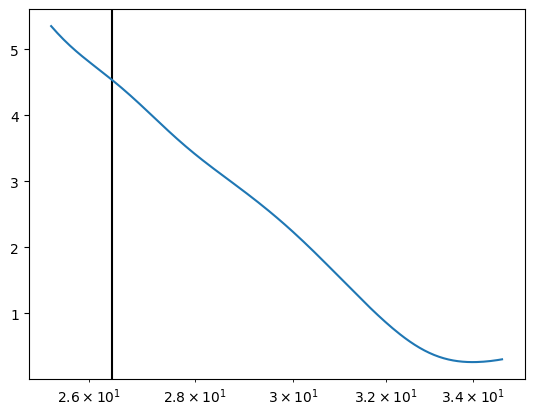

In [10]:
fig, ax = plt.subplots()
ax.set_xscale('log')

ax.plot(log_pressure, phi)

# integrate_phi_reference_pressure
ax.axvline(np.log(3e11), c='k', zorder=0.5);

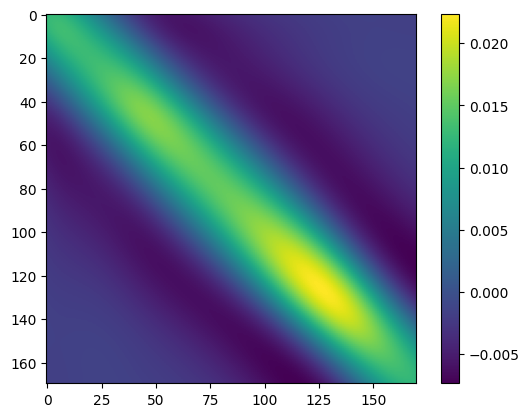

In [11]:
fig, ax = plt.subplots()

ax.imshow(cov, cmap='viridis')
fig.colorbar(ax.imshow(cov, cmap='viridis'));

Is this the correct way to integrate?

In [12]:
eos, cols = integrate_phi(
    np.exp(log_pressure),
    phi,
    reference_pressurec2=3e11,
    sigma_logpressurec2=0,
    stitch_below_reference_pressure=True,
    include_baryon_density=True,
    include_cs2c2=True,
    include_baryon_chemical_potential=False,
    verbose=True
)

performing numeric integration for energy_density via trapazoidal approximation
performing numeric integration for baryon_density via trapazoidal approximation
computing cs2c2 via numeric differentiation


In [13]:
eos, cols

(array([[3.36295248e-07, 1.31539386e+01, 1.31539389e+01, 6.35677634e-08],
        [2.14431941e-06, 4.15964079e+01, 4.15964072e+01, 7.90900128e-08],
        [1.36728240e-05, 1.31539403e+02, 1.31539389e+02, 1.59474159e-07],
        [8.71820285e-05, 4.15964187e+02, 4.15964072e+02, 3.21557708e-07],
        [5.55898774e-04, 1.31539472e+03, 1.31539389e+03, 6.48376671e-07],
        [3.54457739e-03, 4.15964626e+03, 4.15964072e+03, 1.30736105e-06],
        [2.26012890e-02, 1.31539751e+04, 1.31539389e+04, 2.63610747e-06],
        [1.44112601e-01, 4.15966410e+04, 4.15964072e+04, 5.31532081e-06],
        [9.18905186e-01, 1.31540889e+05, 1.31539389e+05, 1.07174987e-05],
        [5.85921520e+00, 4.15973663e+05, 4.15964072e+05, 2.18301694e-05],
        [2.57912283e+01, 1.04486332e+06, 1.04482099e+06, 3.75828601e-05],
        [1.08539013e+02, 2.62472525e+06, 2.62454051e+06, 6.08964010e-05],
        [4.35157437e+02, 6.59342389e+06, 6.59263838e+06, 8.62028988e-05],
        [5.85142664e+02, 8.30009259e+0

In [14]:
pressure_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('pressurec2')])
energy_density_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('energy_densityc2')])
number_density_mean = to_nucleons_per_cubic_femtometre(eos[:, cols.index('baryon_density')])

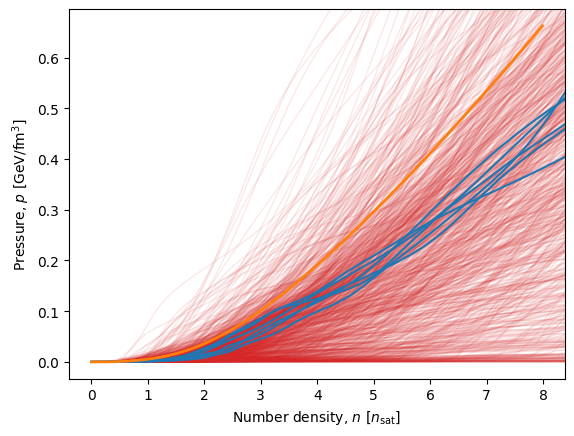

In [ ]:
sets = [2, 0, 1]
N_samp = 100

good_EOSs = {s: [] for s in sets}

pqcd_region_dict = pqcd.get_pqcd_region()

fig, ax = plt.subplots()

ax.plot(number_density_mean/nsat, pressure_mean, c='C1', zorder=3, lw=2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

for s in sets:
    for variety in ['had', 'hyp', 'qrk']:
        for ni in range(N_samp):

            eos = pd.read_csv(f'../data/eos-draws-modified/tests/{s:02}/{variety}agn/eos-draw-{ni:06}.csv')
            
            if pqcd.consistent_with_pqcd(eos, pqcd_region_dict):
                good_EOSs[s].append((variety, ni))
                ax.plot(
                    to_nucleons_per_cubic_femtometre(eos.baryon_density)/nsat,
                    to_GeV_per_cubic_femtometre(eos.pressurec2),
                    c='C0'
                )
            
            else:
                ax.plot(
                    to_nucleons_per_cubic_femtometre(eos.baryon_density)/nsat,
                    to_GeV_per_cubic_femtometre(eos.pressurec2),
                    c='C3',
                    alpha=0.1,
                    lw=1,
                    zorder=0.5
                )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel(r'Number density, $n$ [$n_{\rm sat}$]')
ax.set_ylabel(r'Pressure, $p$ [GeV/fm$^3$]');

We can check the integration by using one of the EOS draws

performing numeric integration for energy_density via trapazoidal approximation
performing numeric integration for baryon_density via trapazoidal approximation
computing cs2c2 via numeric differentiation
performing numeric integration for energy_density via trapazoidal approximation
performing numeric integration for baryon_density via trapazoidal approximation
computing cs2c2 via numeric differentiation
performing numeric integration for energy_density via trapazoidal approximation
performing numeric integration for baryon_density via trapazoidal approximation
computing cs2c2 via numeric differentiation
performing numeric integration for energy_density via trapazoidal approximation
performing numeric integration for baryon_density via trapazoidal approximation
computing cs2c2 via numeric differentiation
performing numeric integration for energy_density via trapazoidal approximation
performing numeric integration for baryon_density via trapazoidal approximation
computing cs2c2 via nume

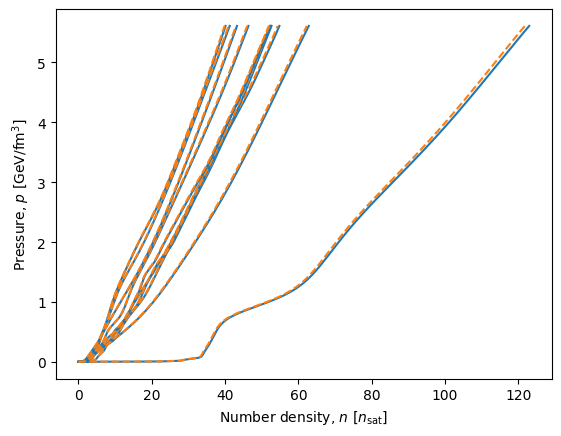

In [16]:
set = 6

repeats = 10
rng = np.random.default_rng()

fig, ax = plt.subplots()

for _ in range(repeats):

    i = rng.integers(0, 2, endpoint=True)
    variety = ['had', 'hyp', 'qrk'][i]

    n = rng.integers(0, 2000, endpoint=True)

    eos = pd.read_csv(
        f'../data/eos-draws-modified/tests/{set:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
    )
    gp = pd.read_csv(
        f'../data/eos-draws-modified/tests/{set:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/draw-gpr_{variety}agn-{n:06}.csv', 
        comment='#'
    )

    eos_integrated, cols = integrate_phi(
        np.exp(gp['log(pressurec2)']).values,
        gp['phi'].values,
        reference_pressurec2=3e11,
        sigma_logpressurec2=0,
        stitch_below_reference_pressure=True,
        include_baryon_density=True,
        include_cs2c2=True,
        include_baryon_chemical_potential=False,
        verbose=True
    )

    ax.plot(
        to_nucleons_per_cubic_femtometre(eos.baryon_density)/nsat, 
        to_GeV_per_cubic_femtometre(eos.pressurec2), 
        c='C0', 
        )

    ax.plot(
        to_nucleons_per_cubic_femtometre(eos_integrated[:, cols.index('baryon_density')])/nsat, 
        to_GeV_per_cubic_femtometre(eos_integrated[:, cols.index('pressurec2')]), 
        c='C1', 
        ls='--',
        )

ax.set_xlabel(r'Number density, $n$ [$n_{\rm sat}$]')
ax.set_ylabel(r'Pressure, $p$ [GeV/fm$^3$]');

Plot all tabulated EOSs

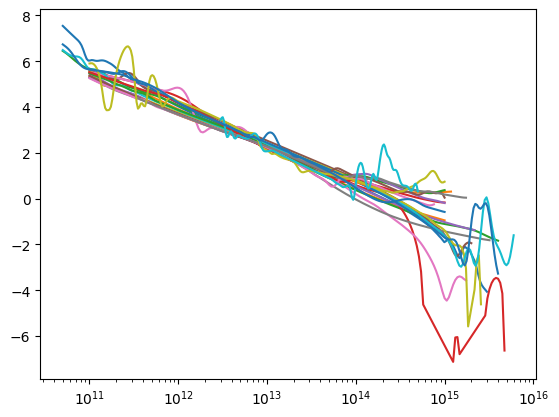

In [18]:
hdf5_paths = {
    'had': ['bsk', 'bsr', 'dd', 'eng', 'gm', 'kde', 'mpa', 'nl', 'r', 'sk', 'sly', 'tm'],
    'hyp': ['bsr', 'dd', 'gm', 'h', 'nl', 'tm'],
    'qrk': ['alf', 'ddq', 'hqc']
}

fig, ax = plt.subplots()
ax.set_xscale('log')

for variety in ['had', 'hyp', 'qrk']:

    for label in hdf5_paths[variety]:

        if variety == 'had':
            file_path = f'../data/eos-draws-default/make-agnostic-processes/{variety}agn/{label}/gpr_gpr_{variety}ronic-{label}.hdf5'
        elif variety == 'hyp':
            file_path = f'../data/eos-draws-default/make-agnostic-processes/{variety}agn/{label}/gpr_gpr_{variety}eronic-{label}.hdf5'
        elif variety == 'qrk':
            file_path = f'../data/eos-draws-default/make-agnostic-processes/{variety}agn/{label}/gpr_gpr_quark-{label}.hdf5'
        
        with h5py.File(file_path, 'r') as f:
            cov = np.array(f['0']['cov'])
            mean = np.array(f['0']['mean'])

        log_pressure = np.array([entry[0] for entry in mean])
        phi = np.array([entry[1] for entry in mean])

        ax.plot(np.exp(log_pressure), phi)

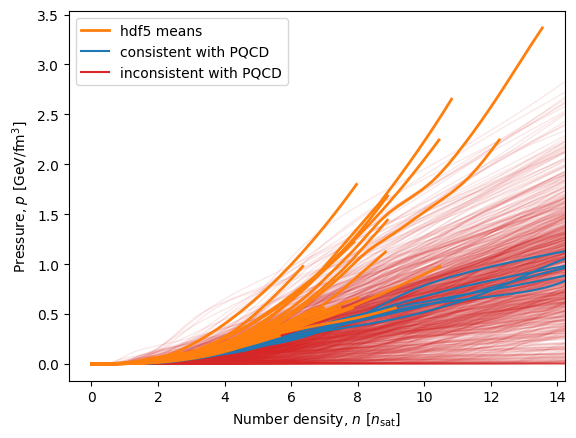

In [19]:
fig, ax = plt.subplots()

for variety in ['had', 'hyp', 'qrk']:
    for path in hdf5_paths[variety]:

        if variety == 'had':
            file_path = f'../data/eos-draws-default/make-agnostic-processes/{variety}agn/{path}/gpr_gpr_{variety}ronic-{path}.hdf5'
        elif variety == 'hyp':
            file_path = f'../data/eos-draws-default/make-agnostic-processes/{variety}agn/{path}/gpr_gpr_{variety}eronic-{path}.hdf5'
        elif variety == 'qrk':
            file_path = f'../data/eos-draws-default/make-agnostic-processes/{variety}agn/{path}/gpr_gpr_quark-{path}.hdf5'

        with h5py.File(file_path, 'r') as f:
            cov = np.array(f['0']['cov'])
            mean = np.array(f['0']['mean'])

        log_pressure = np.array([entry[0] for entry in mean])
        phi = np.array([entry[1] for entry in mean])

        eos, cols = integrate_phi(
            np.exp(log_pressure),
            phi,
            reference_pressurec2=3e11,
            sigma_logpressurec2=0,
            stitch_below_reference_pressure=True,
            include_baryon_density=True,
            include_cs2c2=True,
            include_baryon_chemical_potential=False,
            verbose=False
        )

        pressure_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('pressurec2')])
        energy_density_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('energy_densityc2')])
        number_density_mean = to_nucleons_per_cubic_femtometre(eos[:, cols.index('baryon_density')])

        ax.plot(number_density_mean/nsat, pressure_mean, c='C1', zorder=3, lw=2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

sets = [2, 0, 1]
N_samp = 100

good_EOSs = {s: [] for s in sets}

pqcd_region_dict = pqcd.get_pqcd_region()

for s in sets:
    for variety in ['had', 'hyp', 'qrk']:
        for ni in range(N_samp):

            eos = pd.read_csv(
                f'../data/eos-draws-modified/tests/{s:02}/{variety}agn/eos-draw-{ni:06}.csv'
            )
            
            if pqcd.consistent_with_pqcd(eos, pqcd_region_dict):
                good_EOSs[s].append((variety, ni))
                ax.plot(
                    to_nucleons_per_cubic_femtometre(eos.baryon_density)/nsat,
                    to_GeV_per_cubic_femtometre(eos.pressurec2),
                    c='C0'
                )
            
            else:
                ax.plot(
                    to_nucleons_per_cubic_femtometre(eos.baryon_density)/nsat,
                    to_GeV_per_cubic_femtometre(eos.pressurec2),
                    c='C3',
                    alpha=0.1,
                    lw=1,
                    zorder=0.5
                )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

labels = ['hdf5 means', 'consistent with PQCD', 'inconsistent with PQCD']
handles = [
    plt.Line2D([0], [0], color='C1', lw=2), 
    plt.Line2D([0], [0], color='C0'), 
    plt.Line2D([0], [0], color='C3')
    ]

ax.legend(handles, labels)

ax.set_xlabel(r'Number density, $n$ [$n_{\rm sat}$]')
ax.set_ylabel(r'Pressure, $p$ [GeV/fm$^3$]');

Plot EOSs in the pressure-phi space

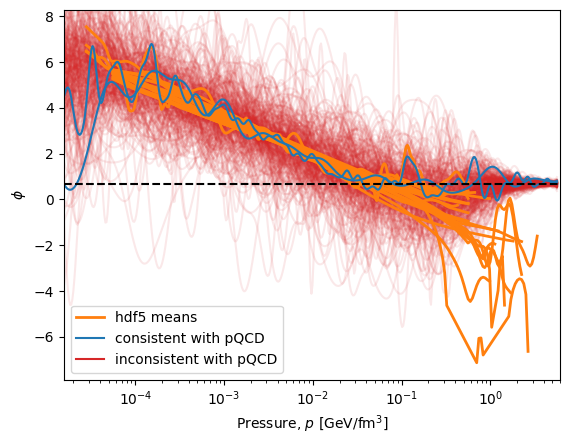

In [20]:
fig, ax = plt.subplots()
ax.set_xscale('log')

for variety in ['had', 'hyp', 'qrk']:
    for path in hdf5_paths[variety]:

        if variety == 'had':
            file_path = f'../data/eos-draws-default/make-agnostic-processes/{variety}agn/{path}/gpr_gpr_{variety}ronic-{path}.hdf5'
        elif variety == 'hyp':
            file_path = f'../data/eos-draws-default/make-agnostic-processes/{variety}agn/{path}/gpr_gpr_{variety}eronic-{path}.hdf5'
        elif variety == 'qrk':
            file_path = f'../data/eos-draws-default/make-agnostic-processes/{variety}agn/{path}/gpr_gpr_quark-{path}.hdf5'

        with h5py.File(file_path, 'r') as f:
            cov = np.array(f['0']['cov'])
            mean = np.array(f['0']['mean'])

        log_pressure = np.array([entry[0] for entry in mean])
        phi = np.array([entry[1] for entry in mean])

        ax.plot(to_GeV_per_cubic_femtometre(np.exp(log_pressure)), phi, c='C1', zorder=1, lw=2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

sets = [0]
N_samp = 100

pqcd_region_dict = pqcd.get_pqcd_region()

for s in sets:
    for variety in ['had', 'hyp', 'qrk']:
        for ni in range(N_samp):

            eos = pd.read_csv(f'../data/eos-draws-modified/tests/{s:02}/{variety}agn/eos-draw-{ni:06}.csv')
            
            if pqcd.consistent_with_pqcd(eos, pqcd_region_dict):
                c='C0'
                alpha=1
                zorder=2
            
            else:
                c='C3'
                alpha=0.1
                zorder=0.5

            gp = pd.read_csv(f'../data/eos-draws-modified/tests/{s:02}/{variety}agn/draw-gpr_{variety}agn-{ni:06}.csv')
            
            ax.plot(
                to_GeV_per_cubic_femtometre(np.exp(gp['log(pressurec2)'])),
                gp['phi'],
                color=c,
                alpha=alpha,
                zorder=zorder
            )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

labels = ['hdf5 means', 'consistent with pQCD', 'inconsistent with pQCD']
handles = [
    plt.Line2D([0], [0], color='C1', lw=2), 
    plt.Line2D([0], [0], color='C0'), 
    plt.Line2D([0], [0], color='C3')
    ]

ax.legend(handles, labels)

ax.axhline(np.log(2), c='k', ls='--', zorder=10)

ax.set_xlabel(r'Pressure, $p$ [GeV/fm$^3$]')
ax.set_ylabel(r'$\phi$');

Perhaps we should be looking at the generated `hdf5` files, from which the EOSs are actually drawn.

In [21]:
# Here I generated EOSs using only qrk alf
# ----------------------------------------

gp_mean_dict = {}

gp_mean_dict['qrk'] = {}

hdf5_path = '../data/eos-draws-modified/tests/05/gpr_gpr_qrkagn.hdf5'

with h5py.File(hdf5_path, 'r') as f:
    for key in f.keys():

        cov = np.array(f[key]['cov'])
        mean = np.array(f[key]['mean'])

        log_pressure = np.array([entry[0] for entry in mean])
        phi = np.array([entry[1] for entry in mean])

        gp_mean_dict['qrk'][key] = (log_pressure, phi)

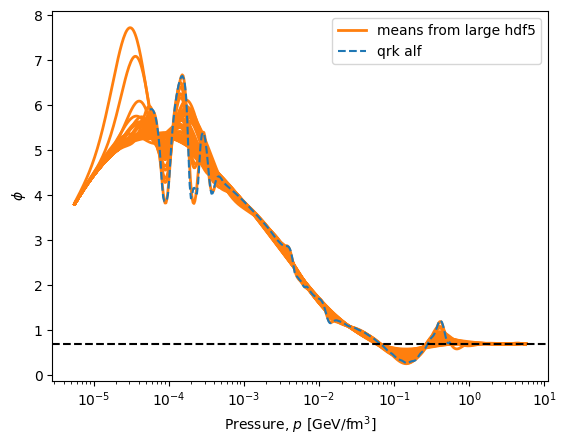

In [22]:
fig, ax = plt.subplots()
ax.set_xscale('log')

for key in gp_mean_dict['qrk'].keys():
    
    log_pressure, phi = gp_mean_dict['qrk'][key]

    if key == '0':
        label = 'means from large hdf5'
    else:
        label = None
    ax.plot(to_GeV_per_cubic_femtometre(np.exp(log_pressure)), phi, c='C1', lw=2, label=label)


file_path = f'../data/eos-draws-default/make-agnostic-processes/qrkagn/alf/gpr_gpr_quark-alf.hdf5'

with h5py.File(file_path, 'r') as f:
    cov = np.array(f['0']['cov'])
    mean = np.array(f['0']['mean'])

log_pressure = np.array([entry[0] for entry in mean])
phi = np.array([entry[1] for entry in mean])

ax.plot(to_GeV_per_cubic_femtometre(np.exp(log_pressure)), phi, c='C0', linestyle='--', zorder=3, label='qrk alf')

ax.axhline(np.log(2), c='k', ls='--', zorder=10)

ax.legend()

ax.set_xlabel(r'Pressure, $p$ [GeV/fm$^3$]')
_ = ax.set_ylabel(r'$\phi$')

Inspect GP means from a particular set

In [23]:
set = 10
varieties = ['qrk']
gp_mean_dict = {}

for variety in varieties:

    hdf5_path = f'../data/eos-draws-modified/tests/{set:02}/{variety}agn/gpr_gpr_{variety}agn.hdf5'

    gp_mean_dict[variety] = {}

    with h5py.File(hdf5_path, 'r') as f:
        for key in f.keys():

            cov = np.array(f[key]['cov'])
            mean = np.array(f[key]['mean'])

            log_pressure = np.array([entry[0] for entry in mean])
            phi = np.array([entry[1] for entry in mean])

            gp_mean_dict[variety][key] = (log_pressure, phi)

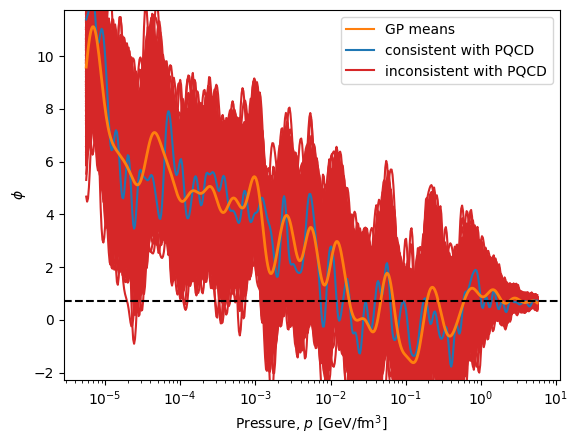

In [24]:
fig, ax = plt.subplots()
ax.set_xscale('log')

for variety in varieties:
    for key in gp_mean_dict[variety].keys():
        log_pressure, phi = gp_mean_dict[variety][key]
        ax.plot(to_GeV_per_cubic_femtometre(np.exp(log_pressure)), phi, c='C1', zorder=2, alpha=1, lw=2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

N_samp = 1000

pqcd_region_dict = pqcd.get_pqcd_region()

for variety in varieties:
    for n in range(N_samp):

        # if n != 3:
        #     continue

        eos = pd.read_csv(
            f'../data/eos-draws-modified/tests/{set:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
        )
        
        if pqcd.consistent_with_pqcd(eos, pqcd_region_dict):
            c='C0'
            alpha=1
            zorder=1
        
        else:
            c='C3'
            alpha=1
            zorder=0.5

        gp = pd.read_csv(
            f'../data/eos-draws-modified/tests/{set:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/draw-gpr_{variety}agn-{n:06}.csv', 
            comment='#'
        )

        ax.plot(
            to_GeV_per_cubic_femtometre(np.exp(gp['log(pressurec2)'])),
            gp['phi'],
            color=c,
            alpha=alpha,
            zorder=zorder
        )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

labels = ['GP means', 'consistent with PQCD', 'inconsistent with PQCD']
handles = [
    plt.Line2D([0], [0], color='C1'), 
    plt.Line2D([0], [0], color='C0'), 
    plt.Line2D([0], [0], color='C3')
    ]

ax.legend(handles, labels, loc='upper right')

ax.axhline(np.log(2), c='k', ls='--', zorder=10)

ax.set_xlabel(r'Pressure, $p$ [GeV/fm$^3$]')
ax.set_ylabel(r'$\phi$');

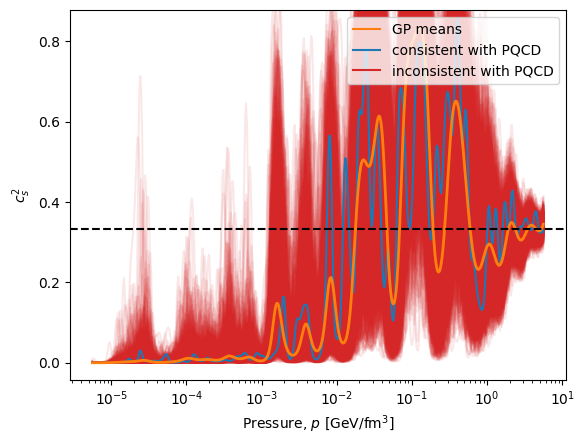

In [25]:
fig, ax = plt.subplots()
ax.set_xscale('log')

for variety in varieties:
    for key in gp_mean_dict[variety].keys():
        log_pressure, phi = gp_mean_dict[variety][key]
        speed_of_sound_squared = 1/(1 + np.exp(phi))
        ax.plot(to_GeV_per_cubic_femtometre(np.exp(log_pressure)), speed_of_sound_squared, c='C1', zorder=2, alpha=1, lw=2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

N_samp = 1000

pqcd_region_dict = pqcd.get_pqcd_region()

for variety in varieties:
    for n in range(N_samp):

        # if n != 3:
        #     continue

        eos = pd.read_csv(
            f'../data/eos-draws-modified/tests/{set:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
        )
        
        if pqcd.consistent_with_pqcd(eos, pqcd_region_dict):
            c='C0'
            alpha=1
            zorder=1
        
        else:
            c='C3'
            alpha=0.1
            zorder=0.5

        gp = pd.read_csv(
            f'../data/eos-draws-modified/tests/{set:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/draw-gpr_{variety}agn-{n:06}.csv', 
            comment='#'
        )

        ax.plot(
            to_GeV_per_cubic_femtometre(np.exp(gp['log(pressurec2)'])),
            1/(1+np.exp(gp['phi'])),
            color=c,
            alpha=alpha,
            zorder=zorder
        )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

labels = ['GP means', 'consistent with PQCD', 'inconsistent with PQCD']
handles = [
    plt.Line2D([0], [0], color='C1'), 
    plt.Line2D([0], [0], color='C0'), 
    plt.Line2D([0], [0], color='C3')
    ]

ax.legend(handles, labels, loc='upper right')

ax.axhline(1/3, c='k', ls='--', zorder=10)

ax.set_xlabel(r'Pressure, $p$ [GeV/fm$^3$]')
ax.set_ylabel(r'$c_s^2$');

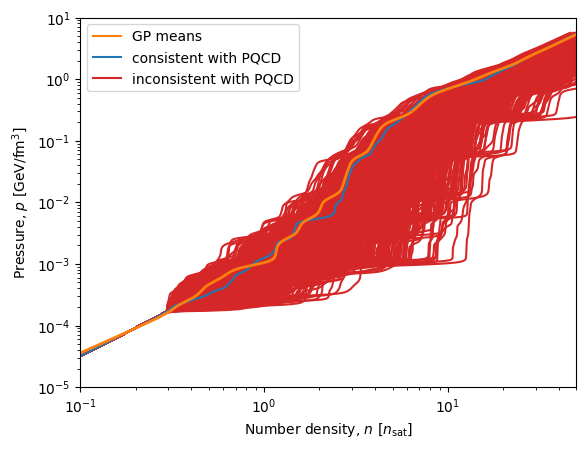

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

for variety in varieties:
    for key in gp_mean_dict[variety].keys():
        
        log_pressure, phi = gp_mean_dict[variety][key]

        eos, cols = integrate_phi(
            np.exp(log_pressure),
            phi,
            reference_pressurec2=3e11,
            sigma_logpressurec2=0,
            stitch_below_reference_pressure=True,
            include_baryon_density=True,
            include_cs2c2=True,
            include_baryon_chemical_potential=False,
            verbose=False
        )

        pressure_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('pressurec2')])
        energy_density_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('energy_densityc2')])
        number_density_mean = to_nucleons_per_cubic_femtometre(eos[:, cols.index('baryon_density')])

        ax.plot(number_density_mean/nsat, pressure_mean, c='C1', zorder=2, alpha=1, lw=2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

N_samp = 1000

pqcd_region_dict = pqcd.get_pqcd_region()

for variety in varieties:
    for n in range(N_samp):

        # if n != 3:
        #     continue

        eos = pd.read_csv(
            f'../data/eos-draws-modified/tests/{set:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
        )
        
        if pqcd.consistent_with_pqcd(eos, pqcd_region_dict):
            c='C0'
            alpha=1
            zorder=1
        
        else:
            c='C3'
            alpha=1
            zorder=0.5

        ax.plot(
            to_nucleons_per_cubic_femtometre(eos.baryon_density)/nsat,
            to_GeV_per_cubic_femtometre(eos.pressurec2),
            color=c,
            alpha=alpha,
            zorder=zorder
        )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlim(0.1,50)
ax.set_ylim(1e-5,10)

labels = ['GP means', 'consistent with PQCD', 'inconsistent with PQCD']
handles = [
    plt.Line2D([0], [0], color='C1'), 
    plt.Line2D([0], [0], color='C0'), 
    plt.Line2D([0], [0], color='C3')
    ]

ax.legend(handles, labels, loc='upper left')

ax.set_xlabel(r'Number density, $n$ [$n_{\rm sat}$]')
ax.set_ylabel(r'Pressure, $p$ [GeV/fm$^3$]');

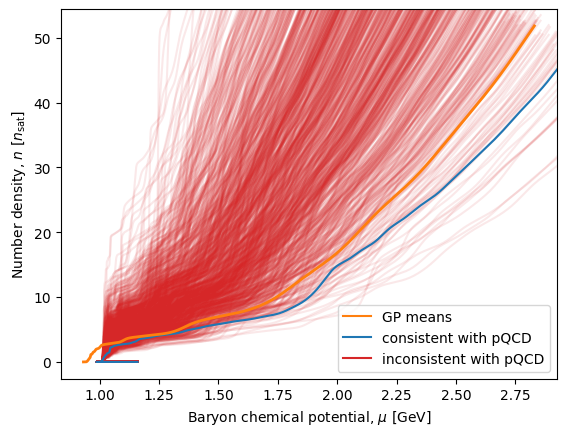

In [26]:
fig, ax = plt.subplots()
# ax.set_xscale('log')
# ax.set_yscale('log')

for variety in varieties:
    for key in gp_mean_dict[variety].keys():
        
        log_pressure, phi = gp_mean_dict[variety][key]

        eos, cols = integrate_phi(
            np.exp(log_pressure),
            phi,
            reference_pressurec2=3e11,
            sigma_logpressurec2=0,
            stitch_below_reference_pressure=True,
            include_baryon_density=True,
            include_cs2c2=True,
            include_baryon_chemical_potential=False,
            verbose=False
        )

        pressure_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('pressurec2')])
        energy_density_mean = to_GeV_per_cubic_femtometre(eos[:, cols.index('energy_densityc2')])
        number_density_mean = to_nucleons_per_cubic_femtometre(eos[:, cols.index('baryon_density')])

        chemical_potential_mean = (energy_density_mean+pressure_mean)/number_density_mean

        ax.plot(chemical_potential_mean, number_density_mean/nsat, c='C1', zorder=2, alpha=1, lw=2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

N_samp = 1000

pqcd_region_dict = pqcd.get_pqcd_region()

for variety in varieties:
    for n in range(N_samp):

        # if n != 3:
        #     continue

        eos = pd.read_csv(
            f'../data/eos-draws-modified/tests/{set:02}/{variety}agn/DRAWmod1000-{int(n/1000):06}/eos-draw-{n:06}.csv'
        )

        pressure = to_GeV_per_cubic_femtometre(eos.pressurec2.values)[0:]
        energy_density = to_GeV_per_cubic_femtometre(eos.energy_densityc2.values)[0:]
        number_density = to_GeV_per_cubic_femtometre(eos.baryon_density.values)[0:]

        chemical_potential = (energy_density+pressure)/number_density
        
        if pqcd.consistent_with_pqcd(eos, pqcd_region_dict):
            c='C0'
            alpha=1
            zorder=1
        
        else:
            c='C3'
            alpha=0.1
            zorder=0.5

        ax.plot(
            chemical_potential,
            number_density/nsat,
            color=c,
            alpha=alpha,
            zorder=zorder
        )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

# ax.set_xlim(1e-4,10)
# ax.set_ylim(0.1, 50)

labels = ['GP means', 'consistent with pQCD', 'inconsistent with pQCD']
handles = [
    plt.Line2D([0], [0], color='C1'), 
    plt.Line2D([0], [0], color='C0'), 
    plt.Line2D([0], [0], color='C3')
    ]

ax.legend(handles, labels, loc='lower right')

ax.set_xlabel(r'Baryon chemical potential, $\mu$ [GeV]')
ax.set_ylabel(r'Number density, $n$ [$n_{\rm sat}$]');